<a href="https://colab.research.google.com/github/Suhail727/Data-Science-Projects/blob/master/Airbnb/Airbnb_(NYC)_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import wordcloud
import functools
import nltk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plotly import express as px
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [0]:
airbnb=pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [0]:
# Find number of Rows
len(airbnb)

48895

In [0]:
# Check the Data Types
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Data Cleaning and Wrangling

In [0]:
# Check for Null Values
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [0]:
# last review cl=olum may not prove to be useful for analysis, although reviews per month will, so replace NaN values in 'reviews_per_month'
airbnb.fillna({'reviews_per_month':0}, inplace=True)

# Also check the unique neighbourhoods
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [0]:
# What about unique Neighbourhoods?
airbnb.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [0]:
# Check different Room Types
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Visualisation

**Price Distribution Analysis**

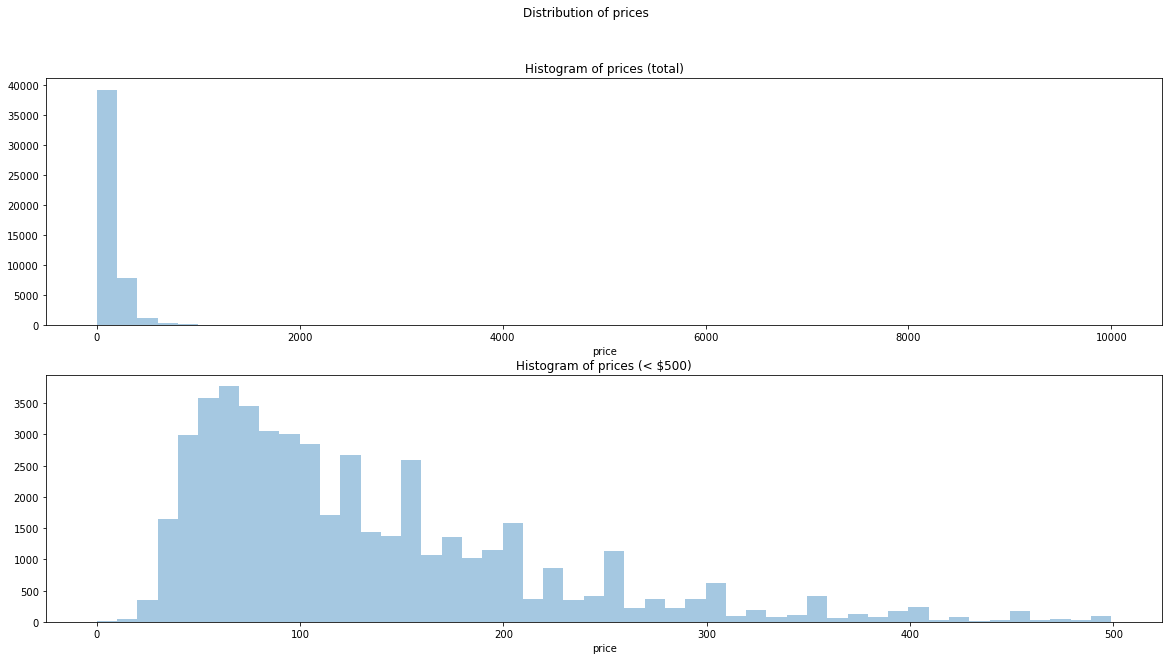

In [0]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(airbnb['price'], kde=False, ax=ax[0])
ax[1].set_title("Histogram of prices (< $500)")
sns.distplot(airbnb[airbnb['price'] < 500]['price'], kde=False, ax=ax[1])



fig.suptitle("Distribution of prices")
fig.show()

**Across Neighbourhood and Neighbourhood Groups**

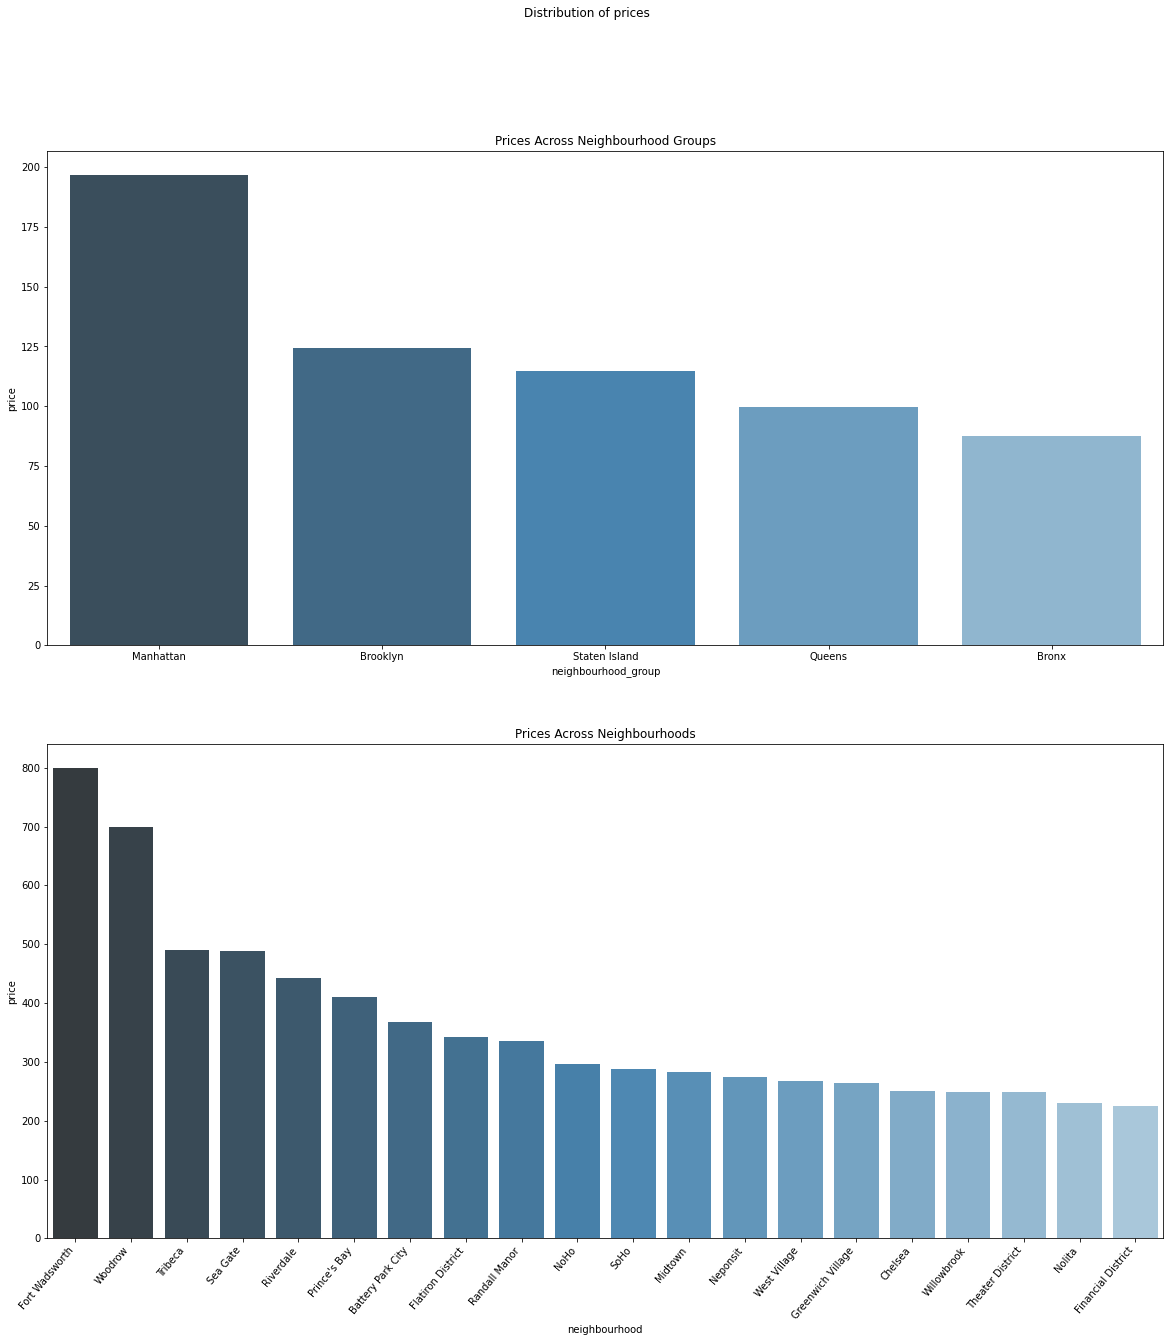

In [0]:
# Price Distribution across Neighbourhood Groups
fig, ax= plt.subplots(2,1, figsize=(20,20))

temp = airbnb.groupby(['neighbourhood_group'])['price'].mean().reset_index().sort_values('price',ascending=False)
ax[0].set_title("Prices Across Neighbourhood Groups")
sns.barplot(temp['neighbourhood_group'], temp['price'], ax=ax[0], palette=("Blues_d"))


temp = airbnb.groupby(['neighbourhood'])['price'].mean().reset_index().sort_values('price',ascending=False)
ax[1].set_title("Prices Across Neighbourhoods")
sns.barplot(temp['neighbourhood'][:20], temp['price'][:20], ax=ax[1], palette=("Blues_d"))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50, ha="right")

fig.suptitle("Distribution of prices")
fig.show()

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

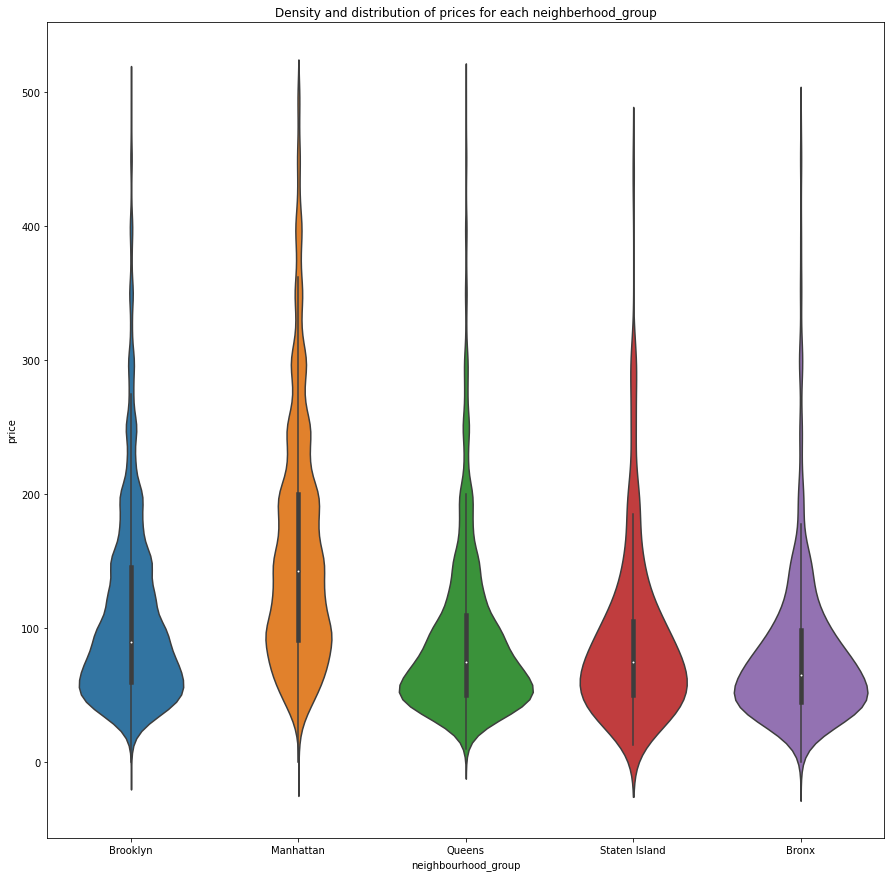

In [0]:
# Using violinplot to showcase density and distribtuion of prices 
plt.figure(figsize=(15,15))
sns.violinplot(data=airbnb[airbnb['price'] < 500], x='neighbourhood_group', y='price')
plt.title('Density and distribution of prices for each neighberhood_group')

**Prices vary across Room Types?**

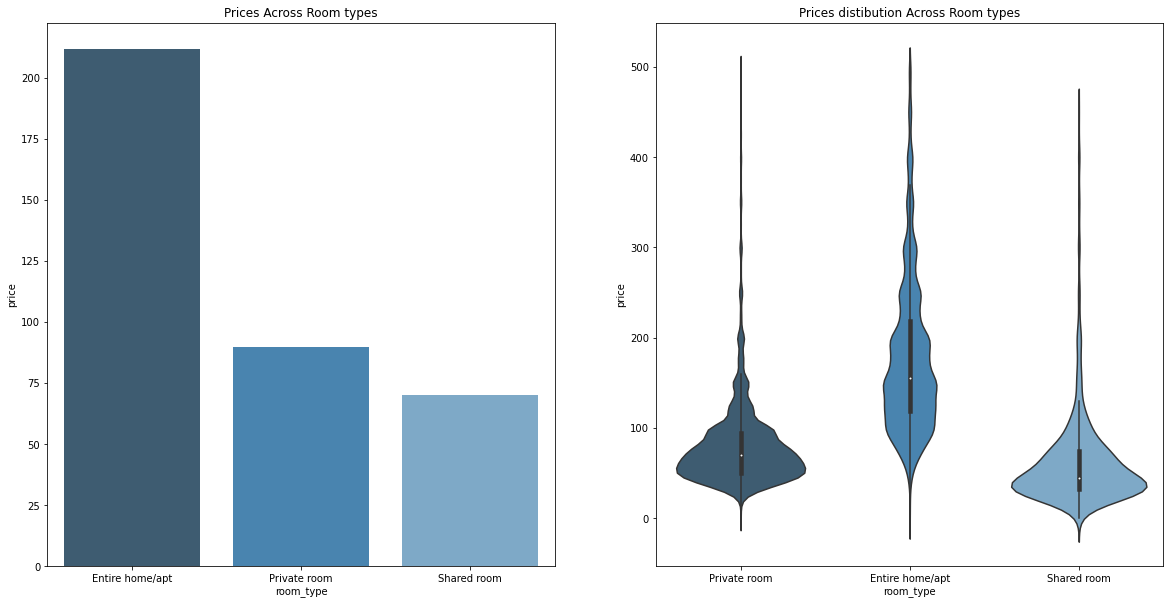

In [0]:
# Price Distribution across Room type
fig, ax= plt.subplots(1,2, figsize=(20,10))

temp = airbnb.groupby(['room_type'])['price'].mean().reset_index().sort_values('price',ascending=False)
sns.barplot(temp['room_type'], temp['price'], ax=ax[0], palette=("Blues_d"))
ax[0].set_title("Prices Across Room types")

sns.violinplot(data=airbnb[airbnb['price'] < 500], x='room_type', y='price', ax=ax[1], palette=("Blues_d"))
ax[1].set_title("Prices distibution Across Room types")

fig.show()

Text(0.5, 1.0, 'Price distribution of each room type in each NYC Neighbourhood Groups')

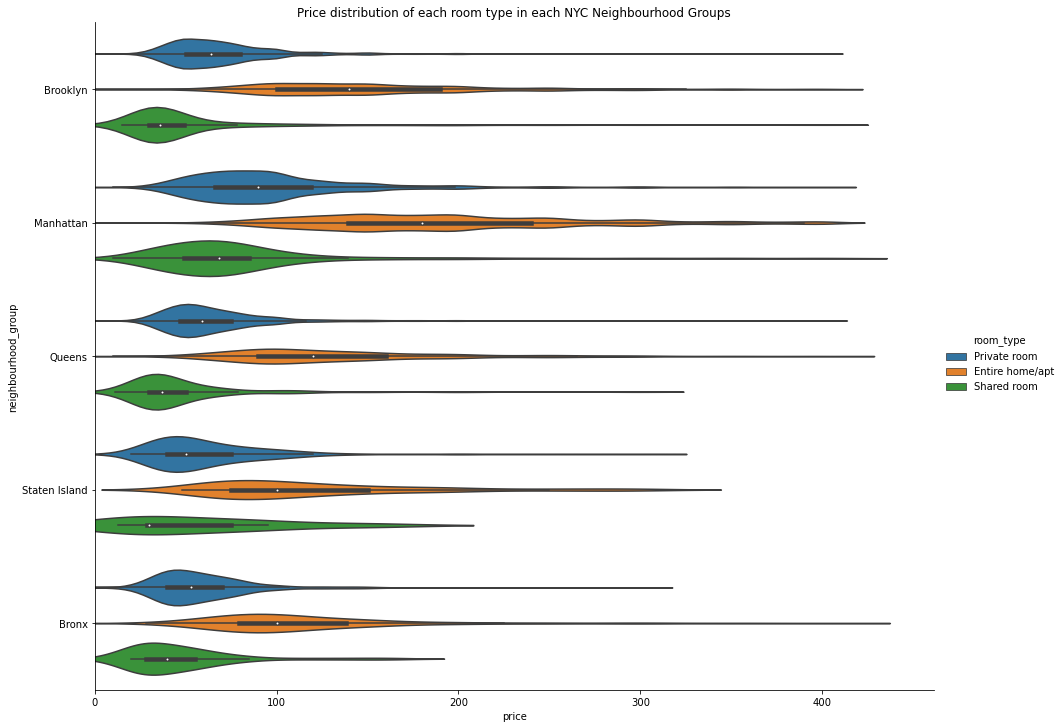

In [0]:
# Prices in Neighburhood Groups across Room Types 
f = sns.catplot(x="price", y="neighbourhood_group", hue="room_type", data=airbnb[airbnb['price'] <= 400], kind='violin', height=10, aspect=20/15)
f.axes[0][0].set_xlim(0,)
plt.title('Price distribution of each room type in each NYC Neighbourhood Groups')

**Do Prices vary with the number of nights?**

In [0]:
airbnb['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

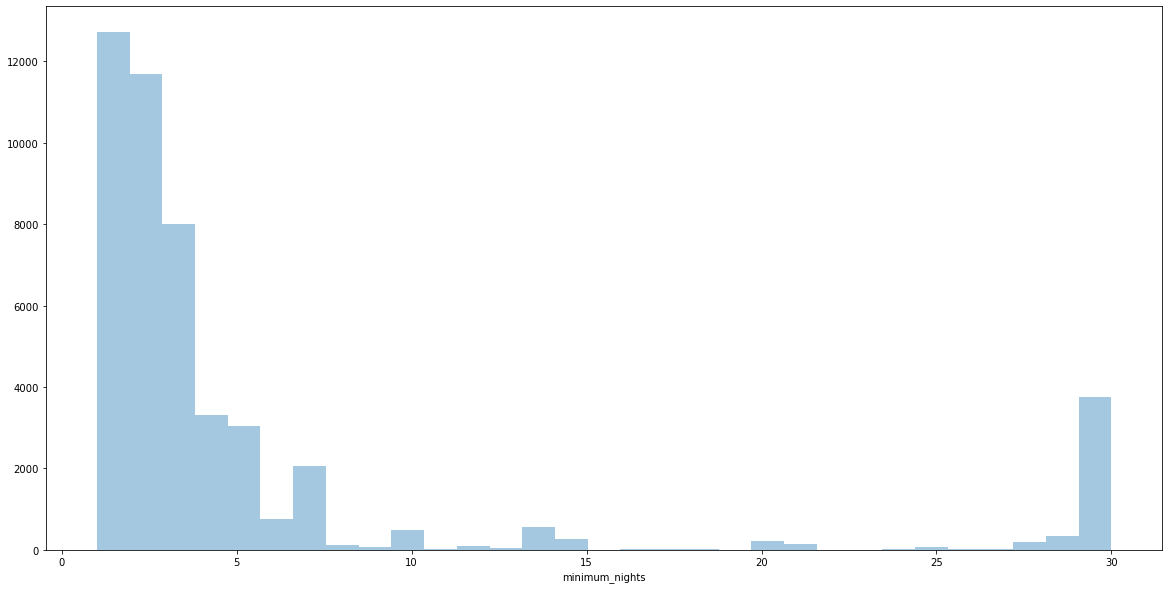

In [0]:
plt.figure(figsize=(20,10))
sns.distplot(airbnb[(airbnb['minimum_nights'] <= 30) & (airbnb['minimum_nights'] > 0)]['minimum_nights'], bins=31, kde=False)

Prices do seem to be consistent with mostly high prices with 1-3 night stays and 7nights stay. 
There is also some trend with stays which are for 30 nights (i.e, A whole month stay)

Text(0, 0.5, 'Price ($)')

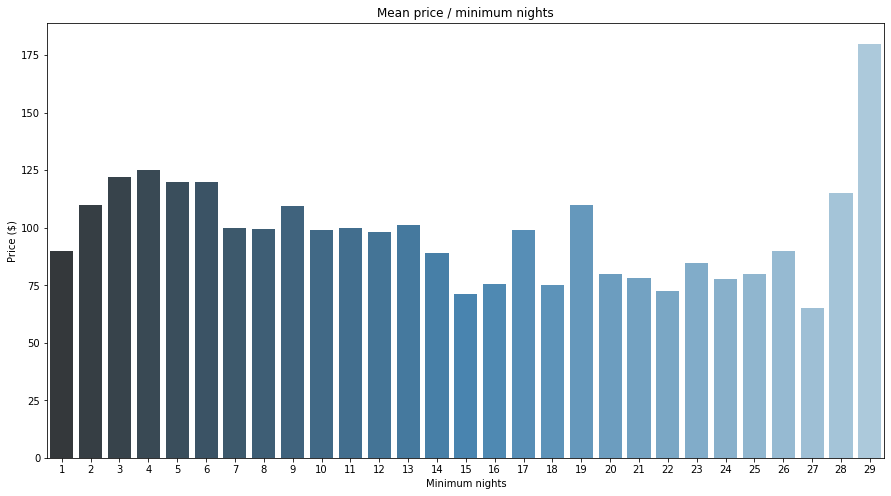

In [0]:
temp = airbnb[airbnb['minimum_nights']<30].groupby(['minimum_nights'])['price'].median().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(temp['minimum_nights'], temp['price'], palette=("Blues_d"))
plt.title('Mean price / minimum nights')
plt.xlabel('Minimum nights')
plt.ylabel('Price ($)')

**Hostings**

In [0]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [0]:
airbnb[airbnb['host_id'] == 219517861].head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,0.0,327,309


In [0]:
airbnb[airbnb['host_id'] == 107434423].head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.7451,-73.97915,Entire home/apt,308,30,0,NaN,0.0,232,156


In [0]:
airbnb[airbnb['host_id'] == 30283594].head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9740,7491713,NYC Lavish Studio Apartment Steps from SoHo!,30283594,Kara,Manhattan,Financial District,40.70862,-74.01408,Entire home/apt,169,30,3,2018-12-07,0.09,121,364


Sonder and Blueground seem to list a lot of properties which can also be verified online. The host with third highest listings seems to be an individual.

**Room descriptions**

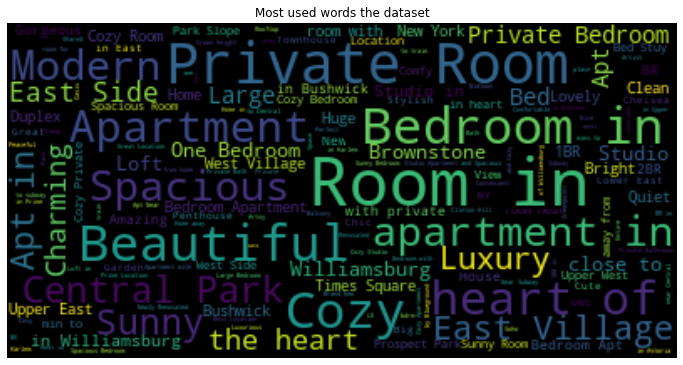

In [0]:
# Words that dont add value considering that data is from NYC
UNWANTED_WORDS = set(['manhattan', 'queen', 'brooklyn', 'nyc'])

fig, ax = plt.subplots(figsize=(12,8))
text = functools.reduce(lambda a,b: a + " " + str(b), airbnb.sample(frac=0.3)['name'])
text = ' '.join([w for w in nltk.word_tokenize(text) if w.lower() not in UNWANTED_WORDS])

wc = wordcloud.WordCloud(max_font_size=40).generate(text)
ax.imshow(wc, interpolation='bilinear')
ax.set_title("Most used words the dataset")
plt.axis("off")
fig.show()

In [0]:
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [0]:
# Average Price per night in top reviewed listings
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night in top reviewed listings: $ {}'.format(price_avrg))

Average price per night in top reviewed listings: $ 65.4


In [0]:
def get_top_terms(documents, ngram_range=(1,1), unwanted_words=set(), min_occurrences=1):
    """ Get a list of the most common n-grams (sorted)
    Params
    ----------
        documents: List of documents to analyze
        ngram_range (tuple): Whether extracting up to n-grams
        unwanted_words (set): Set of custom blacklist of words
        min_occurrences (int): return only words with occurrences >= min_occurrences
    Returns
    ----------
        List of tuples with (word, n_times).
    """
    blacklist = set(stopwords.words('english')).union(unwanted_words)
    vec = CountVectorizer(stop_words = blacklist, ngram_range=ngram_range)
    sum_words = vec.fit_transform(documents).sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    if min_occurrences > 1:
        words_freq = list(filter(lambda x: x[1] >= min_occurrences, words_freq))
    return words_freq

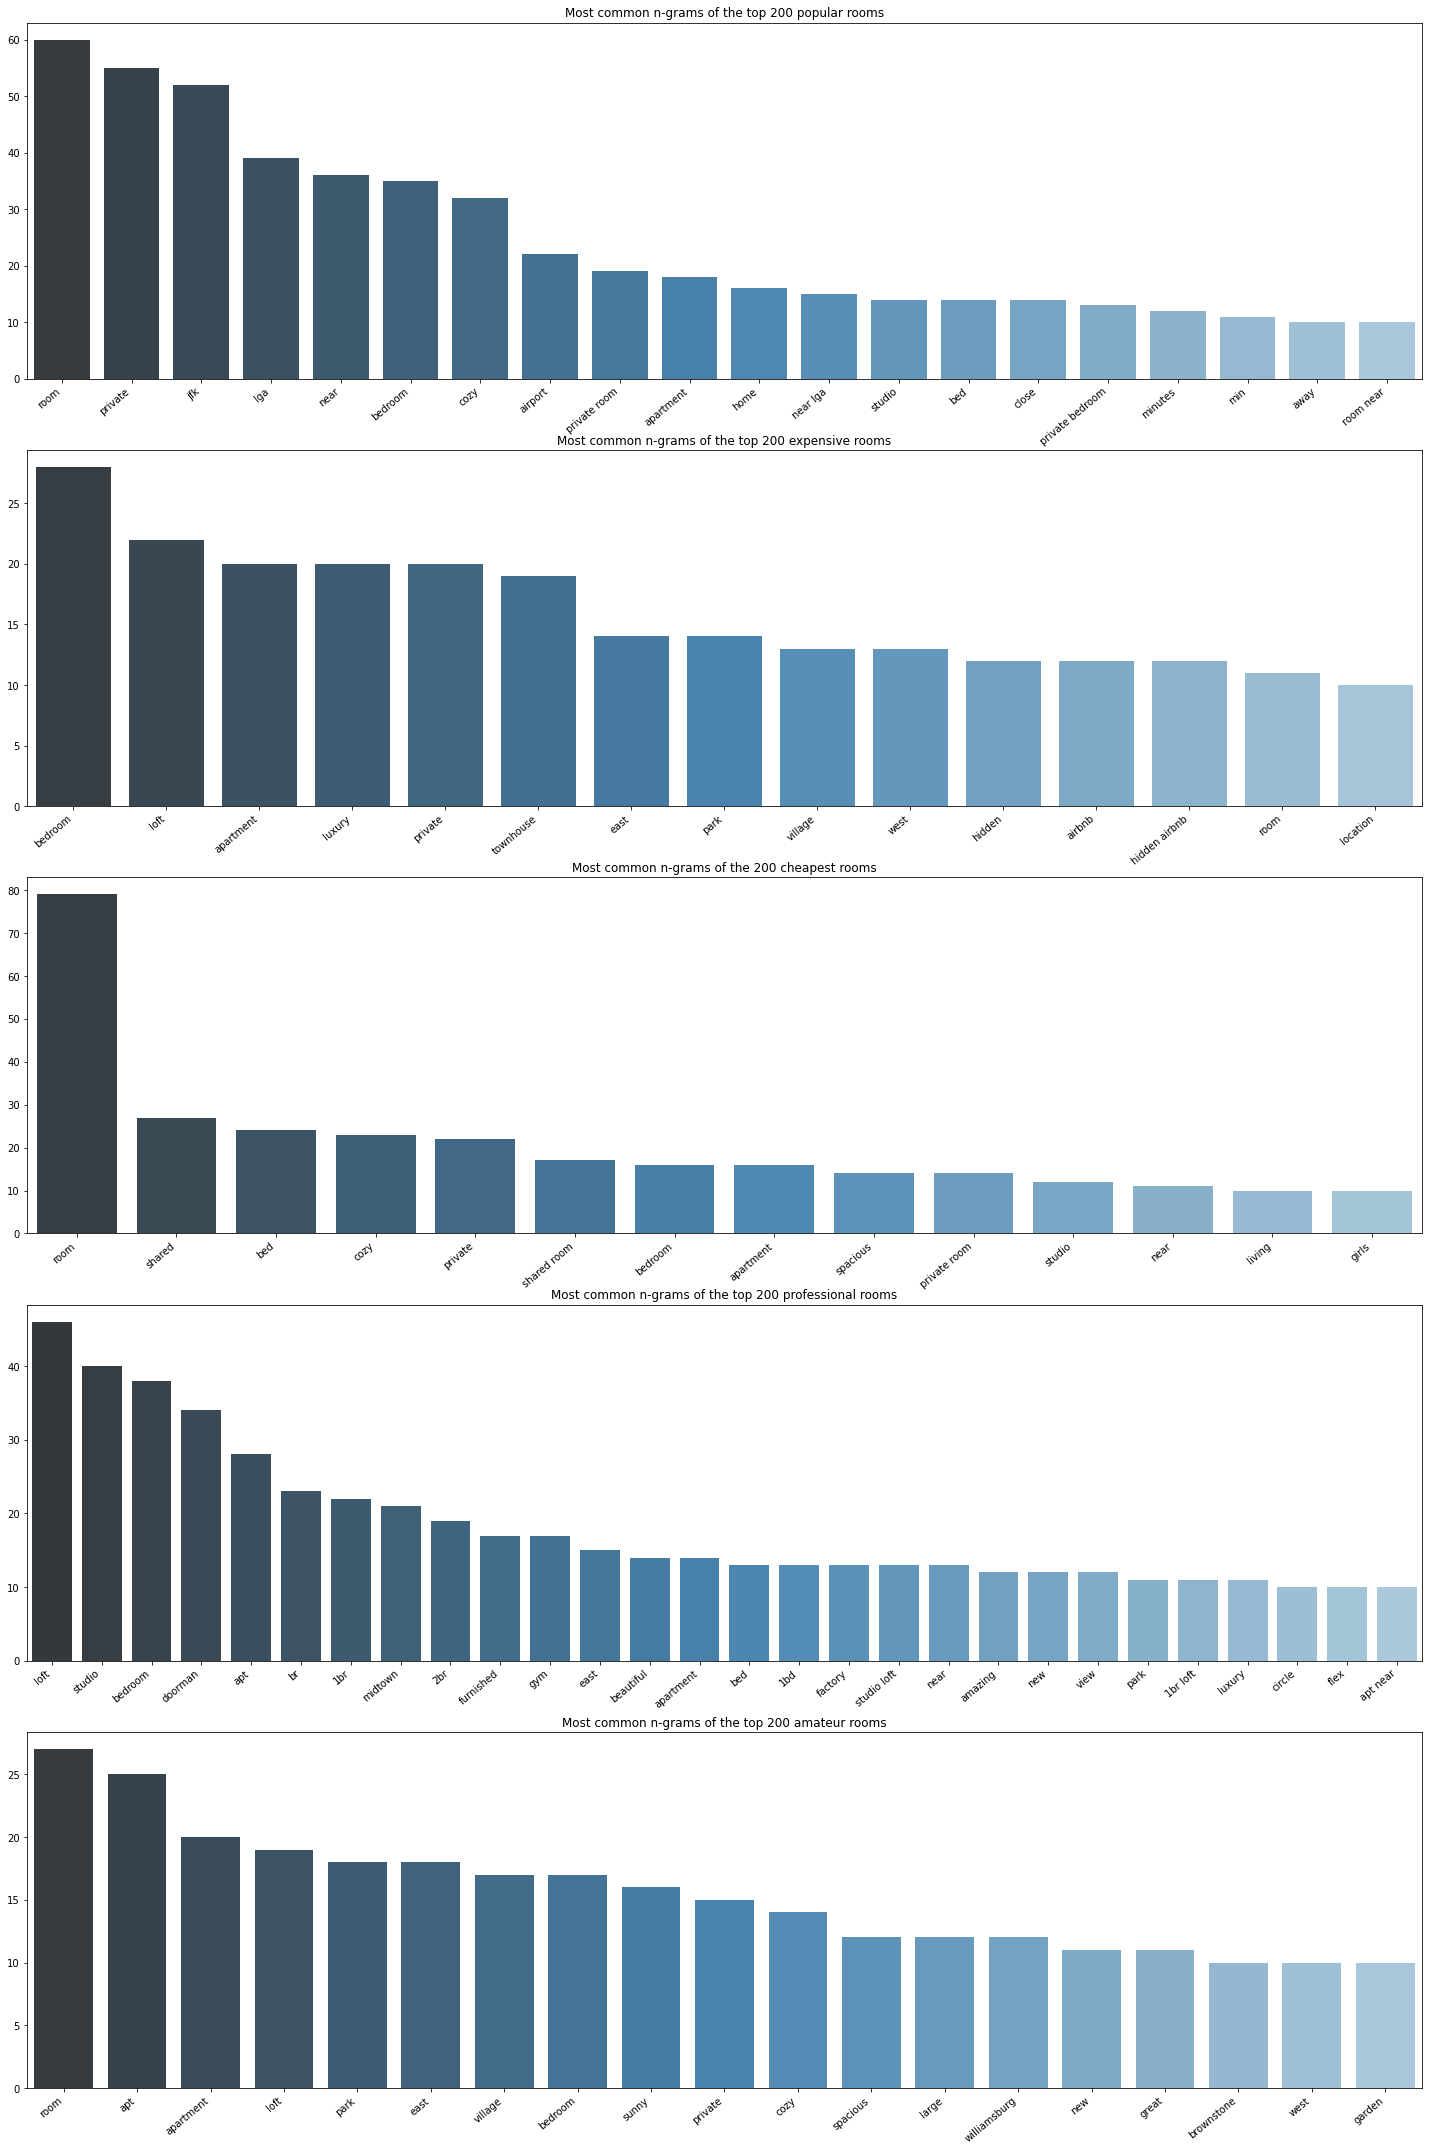

In [0]:
fig, ax= plt.subplots(5,1,figsize=(25,38))

top_ngrams = get_top_terms(airbnb.sort_values('reviews_per_month', ascending=False)['name'].iloc[:200], ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot([x[0] for x in top_ngrams], [x[1] for x in top_ngrams], ax=ax[0],  palette=("Blues_d"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Most common n-grams of the top 200 popular rooms')


top_ngrams = get_top_terms(airbnb.sort_values('price', ascending=False)['name'].iloc[:200], ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot([x[0] for x in top_ngrams], [x[1] for x in top_ngrams], ax=ax[1],  palette=("Blues_d"))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Most common n-grams of the top 200 expensive rooms')


top_ngrams = get_top_terms(airbnb.sort_values('price', ascending=True)['name'].iloc[:200], ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot([x[0] for x in top_ngrams], [x[1] for x in top_ngrams], ax=ax[2],  palette=("Blues_d"))
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=40, ha="right")
ax[2].set_title('Most common n-grams of the 200 cheapest rooms')


top_ngrams = get_top_terms(airbnb[airbnb['calculated_host_listings_count']>50]['name'].iloc[:200], ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot([x[0] for x in top_ngrams], [x[1] for x in top_ngrams], ax=ax[3],  palette=("Blues_d"))
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=40, ha="right")
ax[3].set_title('Most common n-grams of the top 200 professional rooms')


top_ngrams = get_top_terms(airbnb[airbnb['calculated_host_listings_count']<4]['name'].iloc[:200], ngram_range=(1,2), unwanted_words=UNWANTED_WORDS, min_occurrences=10)
sns.barplot([x[0] for x in top_ngrams], [x[1] for x in top_ngrams], ax=ax[4],  palette=("Blues_d"))
ax[4].set_xticklabels(ax[4].get_xticklabels(), rotation=40, ha="right")
ax[4].set_title('Most common n-grams of the top 200 amateur rooms')


fig.show()

**Latitude and Longitude Analysis**

In [0]:
viz_1=airbnb[airbnb['price']<600].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_1.legend()


AttributeError: 'AxesSubplot' object has no attribute 'get_cmap'

In [0]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
# scaling the image based on the latitude and longitude max and mins for proper output
# airbnb[airbnb['price']<600]['latitude'].max()
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
airbnb[airbnb['price']<600].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

TypeError: 'Figure' object is not callable